# Weeks 1-2
This lab assignment covers Weeks 1 and 2 of lecture (Lectures 1-5):
1. Data
2. Linear Regression 1 (Correlation and Ordinary Least Squares)
3. Train Test Splitting
4. Linear Regression 2 (Multiple Regression and Regularization)
5. Classification Errors

### Submission And Assignment Instructions
Submit your `Lab1-2_lastname_firstname.ipynb` file on gradescope with your answers clearly marked (✅) and code commented. Skeleton code and/or comments are provided throughout to help you.

Formatting Notes:
- ❓Questions you must answer or tasks are marked with a "❓"
- ✅ Answers you should give are marked with "✅ Answer:"
- *Helpful hints are usually given in italics*
- Code you need to write is marked with `## ❓YOUR CODE HERE`
  - ⭐ Bonus questions are marked with a "⭐"
  - 🍓 Bonus answers are marked with a "🍓"

**Please don't erase ANY of these markings!** They're to help the TAs find your answers and code as much as they're to help you find the questions.

## Section 1: Math!

Answers may be submitted as Latex typeset equations OR inserted as pictures of your handwritten notes. For the later, please ensure you take a clear scan/picture of your readable work. If we can not read your writing, we might have to deduct points for incomplete answers.

In [61]:
# Have my code in Latex also attached separately.

## 1.1: Derivation of the Ordinary Least Squares Estimator with Calculus

In the lecture you were introduced to the OLS equations, let's find out where these equations come from!


❓1.1.1 The mean squared error (MSE) function for a simple linear model can be expressed as $E(\beta_0, \beta_1) = \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i)^2$. Take the partial derivative of $E$ wrt $\beta_0$.

>> ✅Answer: $\frac{\partial E}{\partial \beta_0} = $ ?? \\

❓1.1.2 Take the partial derivative of $E$ wrt $\beta_1$.

>> ✅ Answer: $\frac{\partial E}{\partial \beta_1} = $ ?? \\

❓1.1.3 Set both partial derivatives equal to 0 and solve for the optimal parameter values of $\beta_0$ and $\beta_1$.

      

>> ✅ Answer:

### ⭐ 1.2: Bonus - Linear Algebra Notation for Multiple Linear Regression

We can rewrite the OLS equations above like this:

\begin{align}
  \hat Y &= \begin{pmatrix}  
             1 & x_1 \\
             1 & x_2 \\
             \vdots & \vdots \\
             1 & x_n
          \end{pmatrix}\begin{pmatrix}
                               \beta_0 \\
                               \beta_1
                              \end{pmatrix} \\~\\
         &= \begin{pmatrix}  
             1 & | \\
             \vdots & \vec x \\
             1 & |
          \end{pmatrix}\begin{pmatrix}
                               \beta_0 \\
                               \beta_1
                              \end{pmatrix} \\ ~\\
         &= X  \vec{\beta}
\end{align}

⭐ 1.2.1 **Why do we need a column of 1s in the $X$ matrix above? (one sentence)** \\

🍓 Answer:

⭐ 1.2.2 Imagine we now have 2 independent variables, which we'll call $\vec x_1$ and $\vec x_2$, that we wish to use to predict $\vec y$. We will also fit a new parameter, $\beta_2$ to represent the "slope" from the $X_2$ predictor. Write the new equations for $\hat Y$ in matrix form, with $\vec \beta = \begin{pmatrix}\beta_0 \\ \beta_1 \\ \beta_2 \end{pmatrix}$.

🍓 Answer:

⭐ 1.2.3 Write new equations for $\vec e$, the vector of residuals in matrix form, with $\vec \beta = \begin{pmatrix}\beta_0 \\ \beta_1 \\ \beta_2 \end{pmatrix}$.

🍓 Answer:

## Section 2: Brain and Body Weights

### 2.1: Loading the data
Use the provided code block to upload the file to collab.

In [1]:
# load local file "data01.txt"
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data_01_brains.txt to data_01_brains.txt
User uploaded file "data_01_brains.txt" with length 818 bytes


❓2.1.1 Write code to read in your uploaded file as a pandas dataframe and visualize the first 5 rows.

In [12]:
# import numpy and pandas to prep your workspace
import numpy as np
import pandas as pd

## ❓ YOUR CODE HERE
brains = pd.read_table('data_01_brains.txt')

# visualize first five rows using data.head()
brains.head()

,Index,Body.Weight,Brain.Weight
0,1,3.385,44.5
1,2,0.480,15.5
2,3,1.350,8.1
3,4,465.000,423.0
4,5,36.330,119.5


❓2.1.2 Identify and describe the variables in this dataframe. Are these categorical? Ordinal? Integer? Logical?

✅Answer:
the variables are 'index', 'body weight' and 'brain weight'. index is ordinal because it is indicating the position of the subjects in the list.
Body.Weight is numeric because it floating-point numbers rather than integers. Brain.Weight is numeric because it floating-point numbers rather than integers.

### 2.2: Data Exploration & Visualization


❓ 2.2.1 Let's predict brain weight from body weight. Visualize brain weight and body weight on a plot, with the independent variable on the x-axis. Be sure to label all parts of your figure (axis labels with units and title).

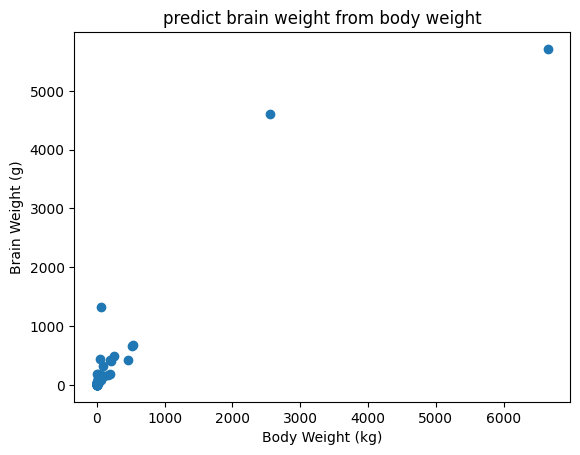

In [13]:
# first import matplotlib
from matplotlib import pyplot as plt

##❓YOUR CODE HERE (to plot)
plt.scatter(brains['Body.Weight'], brains['Brain.Weight'])
plt.title('predict brain weight from body weight')
plt.xlabel('Body Weight (kg)')
plt.ylabel('Brain Weight (g)')
plt.show()

❓2.2.2 What are the assumptions for linear regression? Describe each assumption with <1 sentence.


There is a linear relationship between body weight and brain weight.
The spread of residuals remains consistent across all values of body weight.
The data points are independent from one another.
For any given body weight, brain weight follows a normal distribution.

✅Answer:

### 2.3: Transformation

❓2.3.1 Transform the data to try to correct the linearity assumption and replot. Label your plot appropriately (include axis labels, title, units).

   Index  Body.Weight  Brain.Weight  Log_Body_Weight  Log_Brain_Weight
0      1        3.385          44.5         0.529559          1.648360
1      2        0.480          15.5        -0.318759          1.190332
2      3        1.350           8.1         0.130334          0.908485
3      4      465.000         423.0         2.667453          2.626340
4      5       36.330         119.5         1.560265          2.077368


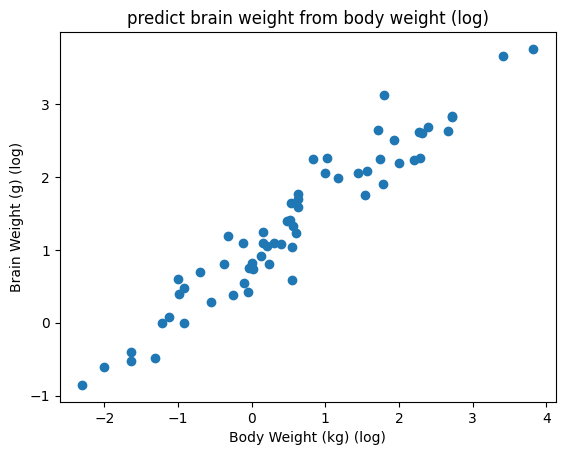

In [14]:
##❓YOUR CODE HERE
# create new columns of log-scaled values in your pd df using data.assign()
log_brains = brains.assign(
  Log_Body_Weight=np.log10(brains['Body.Weight']),
  Log_Brain_Weight=np.log10(brains['Brain.Weight'])
  )
# visualize the first 5 rows of the new df
print(log_brains.head())

# visualize the transformed data
plt.scatter(log_brains['Log_Body_Weight'], log_brains['Log_Brain_Weight'])
plt.title('predict brain weight from body weight (log)')
plt.xlabel('Body Weight (kg) (log)')
plt.ylabel('Brain Weight (g) (log)')
plt.show()

❓2.3.2 Have we satisfied these assumptions for the relationship between brain and body weight? What assumption(s) did the transformation help satisfy? *Your plot should qualitatively answer this question, you don't need to perform statistical tests or analysis beyond visual inspection.*

The log transformation made the relationship between body weight (X) and brain weight (Y) more linear, reduced heteroscedasticity by equalizing the spread, and improved the normal distribution of Y around X. The data also shows clearer independence post-transformation.

✅ Answer:

### 2.4: A Simple Linear Model

❓2.4.1 Calculate the intercept and slope of a line of best fit using the formulas you derived above (also in the slides from class!)

In [15]:
##❓YOUR CODE HERE

# calculate slope
x = log_brains['Log_Body_Weight']
y = log_brains['Log_Brain_Weight']
n = len(x)
xsum = np.sum(x)
ysum = np.sum(y)
xysum = np.sum(x * y)
xsquaredsum = np.sum(x ** 2)
m = (xysum - (xsum * ysum) / n) / (xsquaredsum - (xsum ** 2) / n)
# be nice to your TAs
# try to print outputs from code labelled and easy to read
# this is an example if you name your slope variable m
print("Slope: ", m)

Slope:  0.7516859362419005


In [16]:
## ❓YOUR CODE HERE
# calculate and display intercept
b = (ysum - m * xsum) / n

# display and be nice to the TAs
print("Intercept: ", b)

Intercept:  0.9271269423484263


### 2.5: Assessing the Model
### Visualizing Error
To do linear regression, we assume that there is a linear relationship between $x$ and $y$, and we assume that the errors in $y$ are normally and equally distributed at each $x$ value. One of the easiest ways to visualize whether these assumptions hold in our model is to make a residuals plot, which displays the errors of the model (the residuals, $y - \hat y$) against the x-values themselves.

❓2.5.1 Calculate residuals and add them to your pandas dataframe. Make a residuals plot and label appropriately (include axis labels, units, plot title)

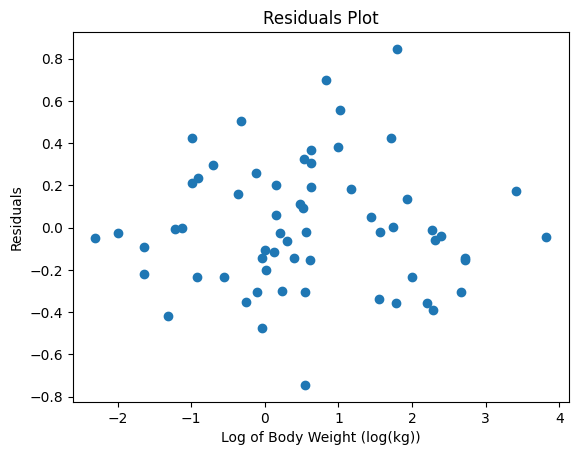

In [17]:
##❓YOUR CODE HERE
# calculate residuals for each observation
residuals = log_brains['Log_Brain_Weight'] - (m * log_brains['Log_Body_Weight'] + b) #y=mx+b

# Make a residuals plot using matplotlib
plt.scatter(log_brains['Log_Body_Weight'], residuals)
plt.xlabel('Log of Body Weight (log(kg))')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


❓2.5.2 Briefly interpret your residuals plot plot. Do you see any patterns? What do the patterns (or lack thereof) imply about your model?

✅ Answer:
The absence of noticeable patterns in the residual plot suggests that the relationship between body weight (X) and brain weight (Y) is linear. If the relationship were quadratic or followed another non-linear function, we would expect to see distinct patterns, such as curves or clusters, in the residuals. Additionally, the variance around each X value appears roughly consistent, which indicates that homoscedasticity is satisfied — meaning the residuals have a similar spread for all X values. This suggests that the assumptions of a linear model hold reasonably well.

### 2.6 Visualize Model

❓2.6.1 Add a line of best fit to your log-scaled data plot from earlier.

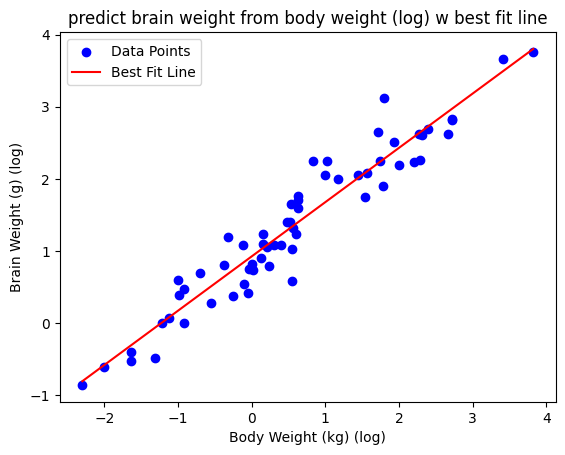

In [8]:
##❓YOUR CODE HERE
# visualize the transformed data
plt.scatter(log_brains['Log_Body_Weight'], log_brains['Log_Brain_Weight'], label='Data Points', color='blue')
plt.title('predict brain weight from body weight (log) w best fit line')
plt.xlabel('Body Weight (kg) (log)')
plt.ylabel('Brain Weight (g) (log)')
plt.plot([min(log_brains['Log_Body_Weight']), max(log_brains['Log_Body_Weight'])], [m * min(log_brains['Log_Body_Weight']) + b, m * max(log_brains['Log_Body_Weight']) + b ], color='red', label='Best Fit Line')
plt.legend()
plt.show()
# remember to add a legend

### ⭐ 2.7 Bonus - Quantitative Error Assessments

Please do this *after* finishing the required assignment.

⭐ 2.7.1 Calculate $R^2$ using the equation from class.

In [9]:
##⭐ YOUR CODE HERE
# Calculate and display R2
SSres = np.sum(residuals ** 2)
SStot = np.sum((y - np.mean(y)) ** 2)
R2 = 1 - (SSres / SStot)

# more examples of how to be nice to TAs
print("Coefficient of determination: ", R2,
     "\nSSres: ", SSres,
     "\nSStot: ", SStot)

Coefficient of determination:  0.9207837169027255 
SSres:  5.455161494767186 
SStot:  68.86414360123997


⭐ 2.7.2 Explain what you calculated and how it connects to the interpretation of $R^2$. (What’s the total sum of squared errors? Why do we need to use it?)

🍓 Answer:


The total sum of squares (TSS) measures the overall variation in the dependent variable, Y (in our case, brain weight), by comparing each data point to the mean of Y. It represents the total variability in the dataset.

The residual sum of squares (RSS) measures the unexplained variance, or the error, by comparing each observed value to the predicted value from the model. Essentially, it captures how much variation is not explained by the model.

R² is then calculated as the ratio of explained variance (TSS - RSS) to the total variance (TSS). It represents the proportion of the total variance in Y that is explained by the independent variable (body weight) in the model. An R² of 1 means the model explains all the variance, while an R² of 0 means none of the variance is explained by the model. With an R² value of 0.9208, it means that 92.08% of the total variation in brain weight (Y) is explained by the body weight (X) in the model. This indicates a very strong linear relationship between body weight and brain weight in the transformed data.

⭐ 2.7.3 Does it matter if we calculate $R^2$ from the log-scaled data or from the raw (untransformed) data of body/brain weights? Re-calculate $R^2$ from the untransformed data and estimates of brain weight from your model and display it. Does this estimate match what you calculated above? Why or why not?

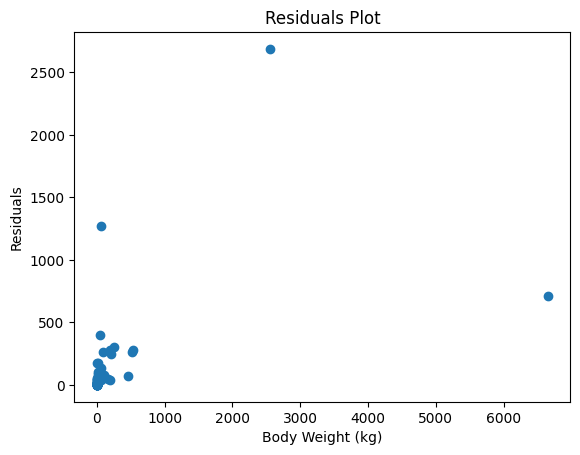

Coefficient of determination:  0.8088481900407642 
SSres:  10091009.856871461 
SStot:  52790553.534509696


In [10]:
##⭐ YOUR CODE HERE
# recalculate some of the quantities you found above (SSres, SStot, R^2)
# and compare to what you had before

residuals_base = log_brains['Brain.Weight'] - (m * log_brains['Body.Weight'] + b) #y=mx+b

# Make a residuals plot using matplotlib
plt.scatter(log_brains['Body.Weight'], residuals_base)
plt.xlabel('Body Weight (kg)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

SSres = np.sum(residuals_base ** 2)
SStot = np.sum((log_brains['Brain.Weight']  - np.mean(log_brains['Brain.Weight'] )) ** 2)
R2 = 1 - (SSres / SStot)

# more examples of how to be nice to TAs
print("Coefficient of determination: ", R2,
     "\nSSres: ", SSres,
     "\nSStot: ", SStot)

🍓 Answer:

For the log-transformed data, we found an R^2of 0.9208. This means that 92.08% of the variation in brain weight is explained by body weight when both are on a logarithmic scale. This high R^2 indicates that the log transformation has made the relationship between body weight and brain weight appear more linear and clearer, allowing the model to fit the data very well.

In contrast, when we calculated R^2 using the raw, untransformed data, the value was 0.8088. This shows that 80.88% of the variation in brain weight is explained by body weight in the original scale. This lower
R^2 suggests that the raw data might have more complexity or variability that isn't as easily captured by the model.

To understand why these values differ, consider the following:

SSres (Residual Sum of Squares): For the log-transformed data, SSres was 5.4551, which represents the error or the amount of variation in brain weight that is not explained by the model. For the raw data, SSres was 10091009.8569, showing much larger residuals and, therefore, more unexplained variation.

SStot (Total Sum of Squares): For the log-transformed data, SStot was 68.8641, representing the total amount of variation in brain weight. For the raw data, SStot was 52790553.5345, indicating a larger spread of data points around the mean.

The higher R^2 with the log transformation indicates that it has helped the model better explain the variation in brain weight by making the relationship more linear and reducing the residuals. In contrast, the raw data shows more unexplained variation and a less clear relationship, which is reflected in the lower R^2. Essentially,log-transformed data is higher because the transformation helps better align the data with the assumptions of linear regression, such as constant variance and normality of residuals.

⭐ 2.7.4 Calculate MSE and RMSE explicitly and display their values.


In [11]:
##⭐YOUR CODE HERE
# calculate MSE and RMSE
MSE_log = np.mean(residuals ** 2)
RMSE_log = np.sqrt(MSE_log)

MSE = np.mean(residuals_base ** 2)
RMSE = np.sqrt(MSE)

# display MSE and RMSE
print("MSE log: ", MSE_log, "\nRMSE log: ", RMSE_log)
print("MSE: ", MSE, "\nRMSE: ", RMSE)

MSE log:  0.08798647572205139 
RMSE log:  0.2966251434421084
MSE:  162758.2234979268 
RMSE:  403.4330471068611


### 2.8: Model Interpretation

❓2.8.1 This model was built on data from 62 mammalian species.  Does it do a good job predicting species brain weight from body weight? Suggest one way to make this model better.



✅ Answer:

The linear regression model built to predict brain weight from body weight across 62 mammalian species demonstrates strong predictive capabilities, with an R2 value of 0.9208. This high R2 signifies that 92.08% of the variability in brain weight can be explained by variations in body weight when using the log-transformed data. The log transformation was crucial here, as it addressed the non-linearity in the raw data and reduced heteroscedasticity, making the relationship between body weight and brain weight more linear and clearer.

Why is this important? A high R2 value means the model does an excellent job capturing the relationship between body weight and brain weight among mammals. For instance, consider two mammalian species: an elephant and a mouse. Even though their body weights differ enormously, the model can predict brain weight with high accuracy for both because the log transformation brings their data points into a more comparable scale.

How can we improve the model? One way to enhance this model is by incorporating additional biological and ecological variables. For example, including variables like metabolic rate, activity levels, or dietary habits might account for more nuanced differences between species. Such factors can influence brain development and size beyond what is captured by body weight alone. Moreover, evolutionary factors, such as whether species have adapted to specific environments or ecological niches, might also play a role in brain weight variation. By integrating these additional predictors, the model could become more comprehensive and provide even more accurate predictions.

❓2.8.2 Is this model a good way to predict human brain weights from body weights?

✅ Answer:

Applying this model directly to human brain weights raises significant concerns. Although the model performs well for the broad range of mammalian species, humans represent a unique case. For instance, humans have larger brains relative to body weight compared to most mammals. This discrepancy arises from our species' specific evolutionary and developmental trajectories.

Why is this a problem? The model was trained on data from a diverse group of mammals, each with its evolutionary adaptations and physiological differences. Humans have highly specialized brain functions and structures, such as advanced cognitive abilities and language, which are not necessarily reflected in the same way in other mammals. For example, the brain-to-body weight ratio in dolphins or primates might not align perfectly with that of humans due to differences in brain structure and function.

How can we address this? To make this model more applicable to humans, one approach is to recalibrate it with human-specific data. This could involve collecting data from a range of human subjects and refining the model to better reflect human physiology. Additionally, incorporating other relevant factors such as age, sex, and neurological health could improve the model's accuracy. For example, brain weight varies with age and developmental stage, so adjusting for these factors could lead to more precise predictions.

## Section 3: Multiple Linear Regression


### 3.1: Load the data, prep for modelling

Run the following codeblock to upload the file `data_01_wdbc.data.csv`

In [18]:
# upload local file "data01_breastcancer.csv"
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# load file
# be sure to specify the header explicitly for this data, as it isn't included in the first row
colnames = ["ID", "diagnosis",
            "radius1","texture1","perimeter1","area1","smoothness1","compactness1","concavity1",
              "concave_points1", "symmetry1","fractal_dimension1",
            "radius2","texture2","perimeter2","area2","smoothness2","compactness2","concavity2",
              "concave_points2", "symmetry2","fractal_dimension2",
            "radius3","texture3","perimeter3","area3","smoothness3","compactness3","concavity3",
              "concave_points3", "symmetry3","fractal_dimension3"]

Saving data_01_wdbc.data.csv to data_01_wdbc.data.csv
User uploaded file "data_01_wdbc.data.csv" with length 124103 bytes


❓3.1.1 Load the uploaded `.csv` file with breast cancer information as a pandas dataframe, as before. Check that you've loaded the data correctly and specified the header correctly by visualizing the first 5 rows. *You should have 569 observations of 32 features.*

In [19]:
## ❓YOUR CODE HERE
# read in the uploaded file as a pandas df, specify the colnames vector above as the column names
# note that there is no header in data_01_wdbc.data.csv file
cancer =  pd.read_csv('data_01_wdbc.data.csv', header=None, names=colnames)

# visualize the first 5 rows to check your work
cancer.head()

,ID,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


❓3.1.2 Split your data into predictors and output variable. You'll need to create a dummy variable of 0s and 1s to code for "benign" or "malignant" samples, respectively. Make sure to drop columns you don't want to use as predictors from the predictor dataframe (e.g. `ID` probably shouldn't be used as a predictor variable).

In [20]:
## ❓YOUR CODE HERE
# Create a dummy variable for output (tumor diagnosis)
cancer['diagnosis'] = cancer['diagnosis'].map({'B': 0, 'M': 1})
# 0 = benign
# 1 = malignant

# quick check that nothing was mapped to NaN
print(cancer['diagnosis'].isna().any()) # should be false

## Create separate X dataframe for predictors
predictors = cancer.drop(columns=['ID', 'diagnosis'])
output = cancer['diagnosis']

False


In [43]:
predictors.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
cancer['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


❓3.1.3 Split the data randomly into a train and test set; we will compare error rates and metrics on the test data to contrast models. Use `random_state = 12` to make this split reproducible across the class. Call your new predictor dataframes `X_train` and `X_test` for compatibility with the TA scaling code below.

In [22]:
# load train_test_split for this task
from sklearn.model_selection import train_test_split
## ❓YOUR CODE HERE
# reproducibly split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(predictors, output, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (455, 30) (455,)
Testing data shape: (114, 30) (114,)


Run the provided code block below to standardize and scale your predictor variables before building models.

In [23]:
# load standardscaler to scale data
from sklearn.preprocessing import StandardScaler

## ❓YOUR CODE HERE
# select a scaler (you may not always use standardscaler)
scaler = StandardScaler()
# fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# apply the same transformation to the test data - use the parameters
X_test_scaled = scaler.transform(X_test)

### 3.2: Logisitic Regression Model Fitting
❓3.2.1 Fit a logistic regression model using all the available continuous predictors to predict whether the tissue is benign or malignant. Be sure *not* to add regularization - the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) makes it clear that L2 regularization is the default choice.

In [24]:
# load the model I want to use
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## ❓YOUR CODE HERE
# Fitting a logistic regression model
base_model = LogisticRegression(random_state=42, max_iter=1000,)
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_base))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_base))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[70  1]
 [ 4 39]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


❓3.2.2 Fit a second model, this time with L2 regularization.



In [27]:
##❓YOUR CODE HERE
# use L1 regularization to build a model
model_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, random_state=42)
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)

print("L1 Regularization Classification Report:\n", classification_report(y_test, y_pred_l1))
print("L1 Regularization Confusion Matrix:\n", confusion_matrix(y_test, y_pred_l1))

# use L2 regularization to build a model

model_l2 = LogisticRegression(penalty='l2', max_iter=1000, random_state=42) # used random state = 42 here
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)

print("L2 Regularization Classification Report:\n", classification_report(y_test, y_pred_l2))
print("L2 Regularization Confusion Matrix:\n", confusion_matrix(y_test, y_pred_l2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


L1 Regularization Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

L1 Regularization Confusion Matrix:
 [[71  0]
 [ 4 39]]
L2 Regularization Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

L2 Regularization Confusion Matrix:
 [[70  1]
 [ 4 39]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3.3: Evaluating the Models

❓3.3.1 Use both models to make predictions on *both* the training and test data. Report the accuracy for each model on both training and test data.

In [30]:
# load evaluation metrics
from sklearn.metrics import accuracy_score

## ❓YOUR CODE HERE
## Make predictions on the test data, using all 3 models

# calculate accuracy for each set of predictions

## display accuracy values
#print("Accuracies of full, and l2 models on test data:\n", accuracies,
#      "\nAccuracies of full, and l2 models on training data:\n", accuracies_train)

y_pred_train_base = base_model.predict(X_train)
y_pred_train_l1 = model_l1.predict(X_train)
y_pred_train_l2 = model_l2.predict(X_train)

y_pred_test_base = base_model.predict(X_test)
y_pred_test_l1 = model_l1.predict(X_test)
y_pred_test_l2 = model_l2.predict(X_test)

accuracy_train_base = accuracy_score(y_train, y_pred_train_base)
accuracy_train_l1 = accuracy_score(y_train, y_pred_train_l1)
accuracy_train_l2 = accuracy_score(y_train, y_pred_train_l2)
accuracy_test_base = accuracy_score(y_test, y_pred_test_base)
accuracy_test_l1 = accuracy_score(y_test, y_pred_test_l1)
accuracy_test_l2 = accuracy_score(y_test, y_pred_test_l2)





In [31]:
print("Accuracy of base model on training data:", accuracy_train_base)
print("Accuracy of L1 model on training data:", accuracy_train_l1)
print("Accuracy of L2 model on training data:", accuracy_train_l2)


Accuracy of base model on training data: 0.9582417582417583
Accuracy of L1 model on training data: 0.9186813186813186
Accuracy of L2 model on training data: 0.9582417582417583


In [32]:

print("Accuracy of base model on test data:", accuracy_test_base)
print("Accuracy of L1 model on test data:", accuracy_test_l1)
print("Accuracy of L2 model on test data:", accuracy_test_l2)

Accuracy of base model on test data: 0.956140350877193
Accuracy of L1 model on test data: 0.9649122807017544
Accuracy of L2 model on test data: 0.956140350877193


❓3.3.2 Which model has the highest accuracy on the *training* data? Is this what you expect? Why or why not? (1 sentence).

✅ Answer:
The base model and the L2 model both achieve the highest accuracy on the training data, approximately 95.8%. This result is consistent with what is generally expected when evaluating different regularization techniques.

In the context of training data, the base model, which has no regularization, can often achieve high accuracy because it has the flexibility to fit the training data very closely, including capturing any noise or outliers present. This is sometimes referred to as overfitting, where the model learns not just the underlying patterns but also the specific details of the training data that may not generalize well to new data.

The L2 regularization model also achieves a high accuracy on the training data. L2 regularization adds a penalty for larger coefficient values but does not eliminate any features entirely. It helps to constrain the model parameters, which can lead to a more stable and generalizable model. However, in this case, it still achieves similar accuracy to the base model on the training set. This suggests that the regularization strength used in the L2 model is not strong enough to significantly impact performance on the training data, indicating that the model is still effectively capturing the patterns in the data.

So, the high accuracy for both the base and L2 models on the training data is expected because they are designed to fit the training set well. Regularization typically becomes more evident in its impact when evaluating the model's performance on unseen test data, where it can help prevent overfitting and improve generalization.

❓3.3.3 Compare and discuss the accuracies on the *test* data. Consider overfitting.

✅ Answer:
When evaluating the models on the test data, the L1 model exhibits the highest accuracy at about 96.5%, which is slightly better than the base and L2 models, which have accuracies of around 95.6%. This performance difference suggests that the L1 model, despite its lower accuracy on the training data, generalizes better to new, unseen data. L1 regularization can help by forcing some feature coefficients to be exactly zero, effectively selecting a subset of the most important features and reducing overfitting. In contrast, the base model, which does not use regularization, might overfit the training data by capturing noise as if it were a pattern. The L2 model's accuracy is similar to the base model on the test data, indicating that while L2 regularization helps in managing the model’s complexity, it does not outperform the base model in generalizing to new data. Thus, the L1 model’s superior test accuracy suggests it is better at avoiding overfitting and focusing on the most relevant features.

### ⭐ Bonus - 3.4: Evaluating Models with ROC Curves

Since this is a logistic regression model that actually outputs probabilities we threshold into classifications, we can sketch out a ROC curve for each model.

⭐ 3.4.1 Make a ROC curve for each model using the testing data and calculate the AUC for each. For the purposes of this assignment, also make a ROC curve for each model on the training data, not just the testing data. Make sure to label your axes appropriately.

*Hint: We've asked for several different ROC curves and their AUC! You could write a function to print a ROC curve and display the AUC, given a model and data (training or test X and y values). Skeleton code is provided below.*

In [33]:
# load necessary evaluation metrics
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, auc

## ❓YOUR CODE HERE
## Write function to make a ROC curve and calculate AUC
def plot_my_roc_curve(model,X_data,y_values, dataset_name):
  # write your code here
  # predict probabilities of the positive class (malignant tumor)
  y_probs = model.predict_proba(X_data)[:, 1]

  # Compute ROC curve and AUC
  fpr, tpr, _ = roc_curve(y_values, y_probs)
  roc_auc = auc(fpr, tpr)

  ## plotting
  plt.figure(figsize = (4,4))
  # Display ROC curve and AUC
  plt.plot(fpr, tpr, color='blue', lw=2, label=f'{dataset_name} ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
  # add a line for where random chance is on the ROC curve

  # change the limits of the x and y axis so you can see the full plot
  plt.xlim([-0.01, 1.0])
  plt.ylim([-0.01, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.show()



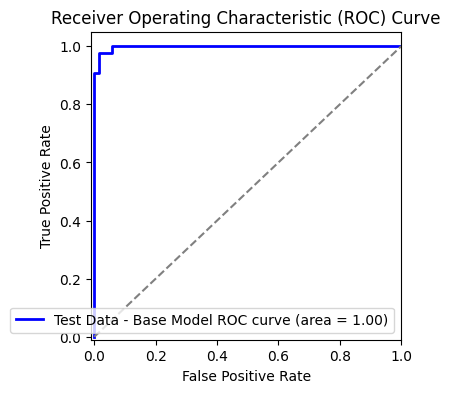

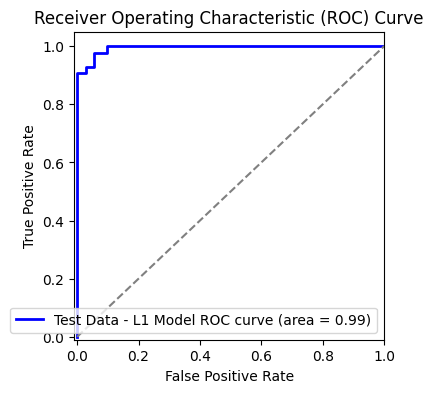

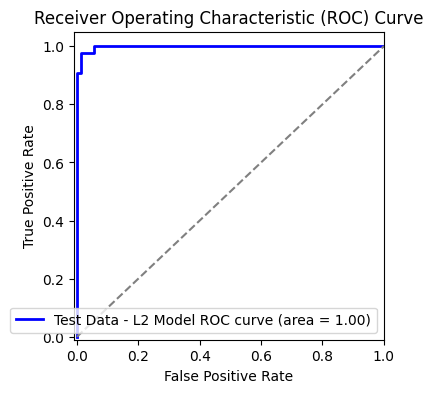

In [34]:
# Apply this function to your test data for each model
plot_my_roc_curve(base_model, X_test, y_test, 'Test Data - Base Model')
plot_my_roc_curve(model_l1, X_test, y_test, 'Test Data - L1 Model')
plot_my_roc_curve(model_l2, X_test, y_test, 'Test Data - L2 Model')


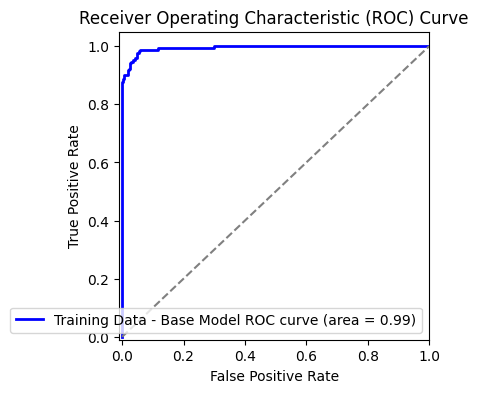

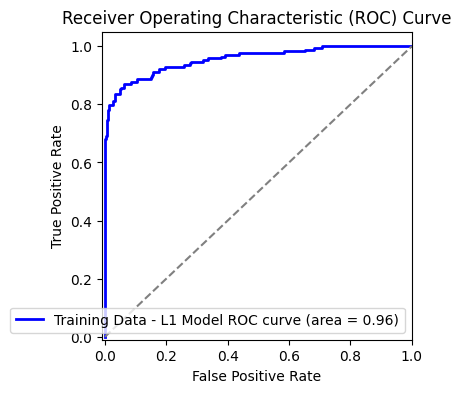

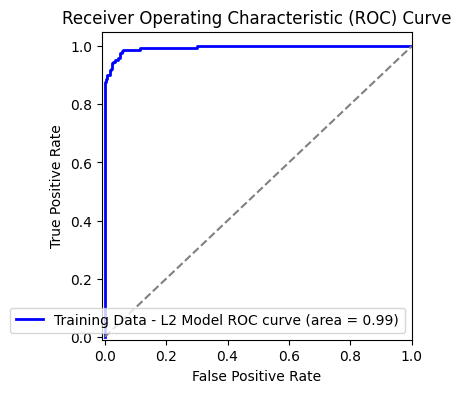

In [35]:
# Apply this function to your training data for each model (unusual, but we are comparing in this assignment)
plot_my_roc_curve(base_model, X_train, y_train, 'Training Data - Base Model')
plot_my_roc_curve(model_l1, X_train, y_train, 'Training Data - L1 Model')
plot_my_roc_curve(model_l2, X_train, y_train, 'Training Data - L2 Model')

⭐ 3.4.2 Briefly compare and contrast your ROC curves and AUC on both models across training and testing data.

🍓Answer:

### Feedback

❓What's one thing you learned in this assignment?

✅ Answer: Base, L1, L2 expectations on training data. I've actually never thought about that question so it was interesting to think about!

❓ What do you wish had been different about this assignment?

✅ Answer:
Maybe an extra bonus problem with some gene regulation or some pharmaceutical data examples (eventually. i know in this assignment the data presented makes the most sense)